## Predicting Beer Reviews
> Griffin Davis and Sydnee Haney

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as MAPE

#### Load in Data

In [23]:
fr = None
try:
    fr = open('../Datasets/beer_ratings.json', 'r')
except:
    try:
        fr = urlopen(
            'https://raw.githubusercontent.com/davisgriffin/Machine_Learning/main/Datasets/beer_ratings.json')
    except:
        raise Exception('Cannot read data')
beer_ratings = pd.read_json(fr, orient='records')
fr.close()

#### Create Dataframes

In [24]:
X = beer_ratings[['beer/ABV', 'user/ageInSeconds',
                  'user/gender', 'beer/style', 'review/overall']]
X = X.dropna()
y = X['review/overall']
X.drop(columns='review/overall', inplace=True)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X

,beer/ABV,user/ageInSeconds,user/gender_Female,user/gender_Male,beer/style_Altbier,beer/style_American Adjunct Lager,beer/style_American Amber / Red Ale,beer/style_American Amber / Red Lager,beer/style_American Barleywine,beer/style_American Black Ale,beer/style_American Blonde Ale,beer/style_American Brown Ale,beer/style_American Dark Wheat Ale,beer/style_American Double / Imperial IPA,beer/style_American Double / Imperial Pilsner,beer/style_American Double / Imperial Stout,beer/style_American IPA,beer/style_American Malt Liquor,beer/style_American Pale Ale (APA),beer/style_American Pale Lager,beer/style_American Pale Wheat Ale,beer/style_American Porter,beer/style_American Stout,beer/style_American Strong Ale,beer/style_American Wild Ale,beer/style_Baltic Porter,beer/style_Belgian Dark Ale,beer/style_Belgian IPA,beer/style_Belgian Pale Ale,beer/style_Belgian Strong Dark Ale,beer/style_Belgian Strong Pale Ale,beer/style_Berliner Weissbier,beer/style_Black & Tan,beer/style_Bock,beer/style_Braggot,beer/style_California Common / Steam Beer,beer/style_Chile Beer,beer/style_Cream Ale,beer/style_Czech Pilsener,beer/style_Doppelbock,...,beer/style_Euro Pale Lager,beer/style_Euro Strong Lager,beer/style_Extra Special / Strong Bitter (ESB),beer/style_Flanders Oud Bruin,beer/style_Foreign / Export Stout,beer/style_Fruit / Vegetable Beer,beer/style_German Pilsener,beer/style_Hefeweizen,beer/style_Herbed / Spiced Beer,beer/style_Irish Dry Stout,beer/style_Irish Red Ale,beer/style_K,beer/style_Keller Bier / Zwickel Bier,beer/style_Kristalweizen,beer/style_Lambic - Unblended,beer/style_Light Lager,beer/style_Low Alcohol Beer,beer/style_M / Oktoberfest,beer/style_Maibock / Helles Bock,beer/style_Milk / Sweet Stout,beer/style_Munich Dunkel Lager,beer/style_Munich Helles Lager,beer/style_Oatmeal Stout,beer/style_Old Ale,beer/style_Pumpkin Ale,beer/style_Quadrupel (Quad),beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Saison / Farmhouse Ale,beer/style_Schwarzbier,beer/style_Scotch Ale / Wee Heavy,beer/style_Scottish Ale,beer/style_Scottish Gruit / Ancient Herbed Ale,beer/style_Smoked Beer,beer/style_Tripel,beer/style_Vienna Lager,beer/style_Wheatwine,beer/style_Winter Warmer,beer/style_Witbier
4,7.7,3.581417e+09,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,5.6,1.782054e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,7.4,9.833726e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25,7.4,1.263823e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30,7.4,8.931710e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49947,9.0,1.031667e+09,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49951,9.0,1.284822e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49956,9.0,8.941214e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Create Linear Model

In [25]:
model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)
score = model.score(X_test, y_test)
print('''R^2: {:.4f}
Mean Absolute Percentage Error: {:.4f}%'''.format(score, MAPE(y_test, prediction)*100))

R^2: 0.1670
Mean Absolute Percentage Error: 14.4057%


#### Visualizing Predictions

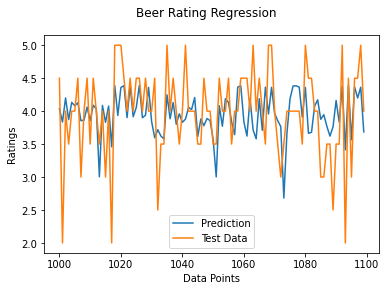

In [26]:
plt.close('all')
x = np.arange(0, len(prediction))
fig, ax = plt.subplots()
ax.plot(x[1000:1100], prediction[1000:1100], label='Prediction')
ax.plot(x[1000:1100], y_test[1000:1100], label='Test Data')
ax.set_xlabel('Data Points')
ax.set_ylabel('Ratings')
fig.suptitle('Beer Rating Regression')
ax.legend()
plt.show()